In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load Datasets
df = pd.read_csv('data/PM25_Station100t.csv')
df

,stationID,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
0,100t,2023-08-01 00:00:00,11,32,9.0,0.31,7.0,1.0,1.4,183,28.3,87,750,0.0
1,100t,2023-08-01 01:00:00,12,35,9.0,0.22,NaN,NaN,1.3,186,28.0,88,749,0.0
2,100t,2023-08-01 02:00:00,15,35,10.0,0.19,6.0,1.0,1.3,185,28.1,88,749,0.0
3,100t,2023-08-01 03:00:00,15,31,9.0,0.19,5.0,1.0,1.1,181,27.8,88,749,0.0
4,100t,2023-08-01 04:00:00,12,33,9.0,0.17,4.0,1.0,1.0,192,27.9,88,749,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,100t,2023-10-19 05:00:00,21,30,3.0,0.36,5.0,NaN,0.2,354,25.0,95,751,0.0
1902,100t,2023-10-19 06:00:00,15,36,3.0,0.38,4.0,NaN,0.1,12,25.1,94,752,0.0
1903,100t,2023-10-19 07:00:00,13,31,6.0,0.39,5.0,NaN,0.4,9,26.5,86,752,0.0
1904,100t,2023-10-19 08:00:00,23,43,12.0,0.42,7.0,NaN,0.4,354,28.6,77,752,0.0


In [3]:
df.shape

(1906, 14)

In [4]:
df.head(5)

,stationID,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
0,100t,2023-08-01 00:00:00,11,32,9.0,0.31,7.0,1.0,1.4,183,28.3,87,750,0.0
1,100t,2023-08-01 01:00:00,12,35,9.0,0.22,NaN,NaN,1.3,186,28.0,88,749,0.0
2,100t,2023-08-01 02:00:00,15,35,10.0,0.19,6.0,1.0,1.3,185,28.1,88,749,0.0
3,100t,2023-08-01 03:00:00,15,31,9.0,0.19,5.0,1.0,1.1,181,27.8,88,749,0.0
4,100t,2023-08-01 04:00:00,12,33,9.0,0.17,4.0,1.0,1.0,192,27.9,88,749,0.0


In [5]:
df.describe()

,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
count,1906.000000,1906.000000,1818.000000,1816.000000,1748.000000,1543.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,8.927597,23.312697,10.989549,0.277379,7.410755,1.067401,1.084103,182.605981,28.304355,81.658447,749.337880,0.358447
std,4.612775,6.844721,5.998661,0.103392,4.202589,0.323115,0.806525,90.937558,2.225938,10.557794,1.568791,2.515154
min,2.000000,9.000000,1.000000,0.080000,1.000000,1.000000,0.000000,0.000000,23.500000,50.000000,744.000000,0.000000
25%,6.000000,19.000000,7.000000,0.210000,5.000000,1.000000,0.300000,163.000000,26.600000,74.000000,748.000000,0.000000
50%,8.000000,23.000000,11.000000,0.260000,6.000000,1.000000,1.000000,190.000000,28.300000,82.000000,749.000000,0.000000
75%,11.000000,27.000000,14.000000,0.320000,9.000000,1.000000,1.700000,203.000000,30.000000,91.000000,750.000000,0.000000
max,38.000000,48.000000,42.000000,0.970000,41.000000,4.000000,3.500000,360.000000,34.200000,99.000000,754.000000,60.200000


In [6]:
# Drop column stationID
df = df.drop(['stationID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  1906 non-null   object 
 1   PM25          1906 non-null   int64  
 2   PM10          1906 non-null   int64  
 3   O3            1818 non-null   float64
 4   CO            1816 non-null   float64
 5   NO2           1748 non-null   float64
 6   SO2           1543 non-null   float64
 7   WS            1906 non-null   float64
 8   WD            1906 non-null   int64  
 9   TEMP          1906 non-null   float64
 10  RH            1906 non-null   int64  
 11  BP            1906 non-null   int64  
 12  RAIN          1906 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 193.7+ KB


In [7]:
# New Dataframe
df

,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
0,2023-08-01 00:00:00,11,32,9.0,0.31,7.0,1.0,1.4,183,28.3,87,750,0.0
1,2023-08-01 01:00:00,12,35,9.0,0.22,NaN,NaN,1.3,186,28.0,88,749,0.0
2,2023-08-01 02:00:00,15,35,10.0,0.19,6.0,1.0,1.3,185,28.1,88,749,0.0
3,2023-08-01 03:00:00,15,31,9.0,0.19,5.0,1.0,1.1,181,27.8,88,749,0.0
4,2023-08-01 04:00:00,12,33,9.0,0.17,4.0,1.0,1.0,192,27.9,88,749,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,2023-10-19 05:00:00,21,30,3.0,0.36,5.0,NaN,0.2,354,25.0,95,751,0.0
1902,2023-10-19 06:00:00,15,36,3.0,0.38,4.0,NaN,0.1,12,25.1,94,752,0.0
1903,2023-10-19 07:00:00,13,31,6.0,0.39,5.0,NaN,0.4,9,26.5,86,752,0.0
1904,2023-10-19 08:00:00,23,43,12.0,0.42,7.0,NaN,0.4,354,28.6,77,752,0.0


In [8]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(df.duplicated().any()))
print('The total number of null values in each colum:')
display(df.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


DATETIMEDATA      0
PM25              0
PM10              0
O3               88
CO               90
NO2             158
SO2             363
WS                0
WD                0
TEMP              0
RH                0
BP                0
RAIN              0
dtype: int64

In [9]:
# fill in the missing values with the mean of the particular column
means = df.drop(columns='DATETIMEDATA').mean()
df.fillna(value=means, inplace=True)
# let's check the data again if there are any missing values
df.isnull().any()

DATETIMEDATA    False
PM25            False
PM10            False
O3              False
CO              False
NO2             False
SO2             False
WS              False
WD              False
TEMP            False
RH              False
BP              False
RAIN            False
dtype: bool

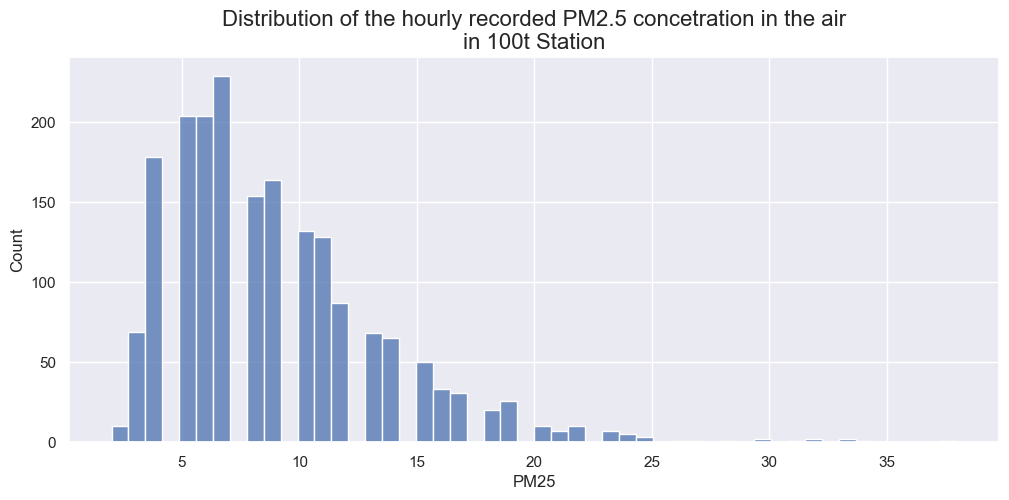

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(df['PM25'],bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concetration in the air\nin 100t Station',
          fontsize=16)
plt.show()

In [11]:
selected_columns = df.columns[df.columns != 'DATETIMEDATA']
df_selected = df[selected_columns]
df_selected

,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
0,11,32,9.0,0.31,7.000000,1.000000,1.4,183,28.3,87,750,0.0
1,12,35,9.0,0.22,7.410755,1.067401,1.3,186,28.0,88,749,0.0
2,15,35,10.0,0.19,6.000000,1.000000,1.3,185,28.1,88,749,0.0
3,15,31,9.0,0.19,5.000000,1.000000,1.1,181,27.8,88,749,0.0
4,12,33,9.0,0.17,4.000000,1.000000,1.0,192,27.9,88,749,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1901,21,30,3.0,0.36,5.000000,1.067401,0.2,354,25.0,95,751,0.0
1902,15,36,3.0,0.38,4.000000,1.067401,0.1,12,25.1,94,752,0.0
1903,13,31,6.0,0.39,5.000000,1.067401,0.4,9,26.5,86,752,0.0
1904,23,43,12.0,0.42,7.000000,1.067401,0.4,354,28.6,77,752,0.0


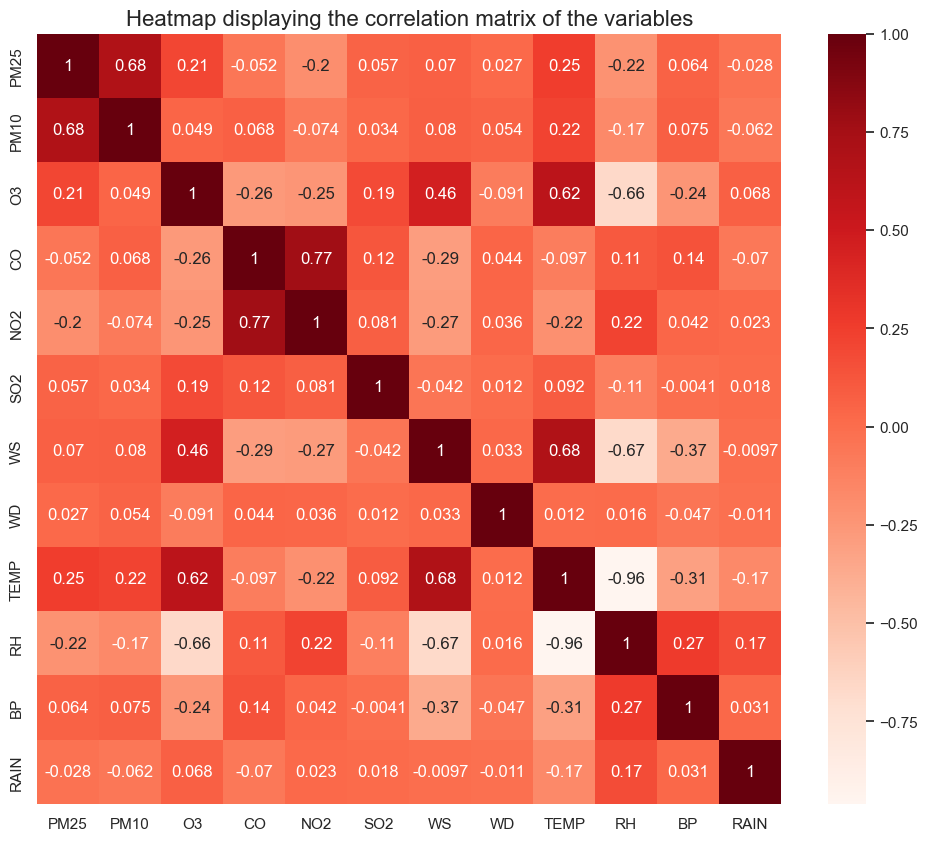

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [14]:
# Export dataframe
df.to_csv('data/PM25_Station100t_with_Prep.csv', index=False)